In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import lz4.frame as lz4f
import cloudpickle as cpkl
import json
import re
import os

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from coffea import hist
from coffea.hist import plot, export
from coffea.util import load

In [2]:
# hists_unmapped16 = load('hists-2016.coffea')
hists_unmapped17 = load('hists.coffea')
hists_unmapped16 = hists_unmapped17

In [3]:
process = hist.Cat("process", "Process", sorting='placement')
process_cat = "dataset"

v16 = hists_unmapped16['genVpt_noselection'].sum('AK8Puppijet0_isHadronicV')
v17 = hists_unmapped17['genVpt_noselection'].sum('AK8Puppijet0_isHadronicV')
whats = v16+v17
whats.scale({'DYJetsToQQ_HT180_13TeV-madgraphMLM-pythia8': 1.45, 'WJetsToQQ_HT180_13TeV-madgraphMLM-pythia8': 1.35}, axis='dataset')

whats = whats.group('dataset', process, {
    '2016 W': [
        'WJetsToQQ_HT180_13TeV-madgraphMLM-pythia8'
    ],
    '2016 Z': [
        'DYJetsToQQ_HT180_13TeV-madgraphMLM-pythia8'
    ],
    "2017 W": [
        "WJetsToQQ_HT400to600_qc19_3j_TuneCP5_13TeV",
        "WJetsToQQ_HT600to800_qc19_3j_TuneCP5_13TeV",
        "WJetsToQQ_HT-800toInf_qc19_3j_TuneCP5_13TeV",
    ],
    "2017 Z": [
        "ZJetsToQQ_HT600to800_qc19_4j_TuneCP5_13TeV",
        "ZJetsToQQ_HT-800toInf_qc19_4j_TuneCP5_13TeV",
        "ZJetsToQQ_HT400to600_qc19_4j_TuneCP5_13TeV",
    ],
})
fig, ax, _ = hist.plot1d(whats, overlay='process');
ax.set_yscale('log')
ax.set_ylim(1, None)
ax.set_xlim(200, 1200)

<IPython.core.display.Javascript object>

(200, 1200)

In [4]:
fig.savefig('genV_bits.pdf')

In [5]:
with open("metadata/samplefiles.json") as fin:
    mapping = json.load(fin)
process_map = {k2: ["JetHT", "SingleMuon"] if k2 == "data_obs" else list(v2) 
           for k2,v2 in mapping['Hbb_2017'].items()}
out = "\n".join('process_map["%s"] = [\n%s\n]' % (k, "\n".join('    "%s",' % x for x in v)) for k,v in process_map.items())
# print(out)


In [6]:
# a = hists_unmapped['jetpt_preselection'].sum('AK8Puppijet0_isHadronicV', overflow='all')["QCD*",450:]
# fig, ax, _ = hist.plot1d(a, overlay='dataset', error_opts={})
# lumi = ax.text(1., 1., r"%.1f fb$^{-1}$ (13 TeV)" % 1.,
#                 fontsize=16, 
#                 horizontalalignment='right', 
#                 verticalalignment='bottom', 
#                 transform=ax.transAxes
#                )

In [8]:
process = hist.Cat("process", "Process", sorting='placement')
process_cat = "dataset"
process_map = OrderedDict()

process_map["tthqq125"] = [
    "ttHTobb_M125_TuneCP5_13TeV_powheg_pythia8",
]
process_map["whqq125"] = [
    "WminusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8",
    "WplusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8",
]
process_map["zhqq125"] = [
    "ZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8",
    "ggZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8",
    "ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8",
]
process_map["vbfhqq125"] = [
    "VBFHToBB_M_125_13TeV_powheg_pythia8_weightfix",
]
process_map["hqq125"] = [
    "GluGluHToBB_M125_13TeV_powheg_pythia8",
]

#process_map["hqq125all"] = [
#    "ttHTobb_M125_TuneCP5_13TeV_powheg_pythia8",
#    "WminusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8",
#    "WplusH_HToBB_WToQQ_M125_13TeV_powheg_pythia8",
#    "ZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8",
#    "ggZH_HToBB_ZToQQ_M125_13TeV_powheg_pythia8",
#    "ZH_HToBB_ZToNuNu_M125_13TeV_powheg_pythia8",
#    "VBFHToBB_M_125_13TeV_powheg_pythia8_weightfix",
#    "GluGluHToBB_M125_13TeV_powheg_pythia8",
#]

process_map["zll"] = [
    "DYJetsToLL_M_50_HT_2500toInf_TuneCP5_13TeV",
    "DYJetsToLL_M_50_HT_400to600_TuneCP5_13TeV",
    "DYJetsToLL_M_50_HT_800to1200_TuneCP5_13TeV",
    "DYJetsToLL_M_50_HT_1200to2500_TuneCP5_13TeV",
    "DYJetsToLL_M_50_HT_600to800_TuneCP5_13TeV",
]
process_map["wlnu"] = [
    "WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8",
    "WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8",
    "WJetsToLNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8",
    "WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8",
    "WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8",
    "WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8",
]

process_map["vvqq"] = [
    "WW_TuneCP5_13TeV-pythia8",
    "ZZ_TuneCP5_13TeV-pythia8",
    "WZ_TuneCP5_13TeV-pythia8",
]
process_map["stqq"] = [
    "ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8",
    "ST_t-channel_antitop_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8",
    "ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8",
    "ST_t-channel_top_4f_inclusiveDecays_TuneCP5_13TeV-powhegV2-madspin-pythia8",
]
process_map["tqq"] = [
    "TTToHadronic_TuneCP5_13TeV_powheg_pythia8",
    "TTToSemiLeptonic_TuneCP5_13TeV_powheg_pythia8",
    "TTTo2L2Nu_TuneCP5_13TeV_powheg_pythia8",
]
process_map["zqq"] = [
    "ZJetsToQQ_HT600to800_qc19_4j_TuneCP5_13TeV",
    "ZJetsToQQ_HT-800toInf_qc19_4j_TuneCP5_13TeV",
    "ZJetsToQQ_HT400to600_qc19_4j_TuneCP5_13TeV",
]

process_map["wqq"] = [
    "WJetsToQQ_HT400to600_qc19_3j_TuneCP5_13TeV",
    "WJetsToQQ_HT600to800_qc19_3j_TuneCP5_13TeV",
    "WJetsToQQ_HT-800toInf_qc19_3j_TuneCP5_13TeV",
]
process_map["qcd"] = [
    "QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8",
    "QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8",
    "QCD_HT1500to2000_TuneCP5_13TeV-madgraphMLM-pythia8",
    "QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8",
    "QCD_HT2000toInf_TuneCP5_13TeV-madgraphMLM-pythia8",
]
process_map["data_obs"] = [
    "JetHT",
    "SingleMuon",
]

# no split signals in stack
#map(process_map.__delitem__, ['tthqq125', 'whqq125', 'zhqq125', 'vbfhqq125', 'hqq125'])
# ignore muon-CR specific
#map(process_map.__delitem__, ['zll', 'wlnu'])

hists = {}
for key, val in hists_unmapped17.items():
    if isinstance(val, hist.Hist):
        hists[key] = val.group(process_cat, process, process_map)

In [9]:
hists['templates_signalregion'].project('process', 'tthqq125')

/afs/crc.nd.edu/user/a/awoodard/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:824: FutureWarning: Hist.project() has been renamed to Hist.integrate().  In the future, Hist.project() will provide different functionality
  warnings.warn("Hist.project() has been renamed to Hist.integrate().  In the future, Hist.project() will provide different functionality", FutureWarning)


<Hist (AK8Puppijet0_isHadronicV,systematic,AK8Puppijet0_pt,AK8Puppijet0_msd,AK8Puppijet0_deepdoubleb) instance at 0x7f06208d2cf8>

In [10]:
x = (hists['templates_muoncontrol']
         .sum('AK8Puppijet0_isHadronicV', 'AK8Puppijet0_msd', overflow='all')
         .project('systematic', '')
         .sum('AK8Puppijet0_pt') #, slice(600,None))
    )

xaxis = 'AK8Puppijet0_deepdoubleb'

/afs/crc.nd.edu/user/a/awoodard/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:824: FutureWarning: Hist.project() has been renamed to Hist.integrate().  In the future, Hist.project() will provide different functionality
  warnings.warn("Hist.project() has been renamed to Hist.integrate().  In the future, Hist.project() will provide different functionality", FutureWarning)


In [11]:
x = (hists['muonpt_muoncontrol']
         .sum('AK8Puppijet0_isHadronicV', overflow='all')
    )

xaxis = 'vmuoLoose0_pt'
x = x.rebin(xaxis, hist.Bin(xaxis, "Leading muon pt", 25, 0, 500))

In [12]:
x = (hists['jetpt_muoncontrol']
         .sum('AK8Puppijet0_isHadronicV', overflow='all')
    )

xaxis = 'AK8Puppijet0_pt'
x = x.rebin(xaxis, hist.Bin(xaxis, x.axis(xaxis).label, 40, 400, 1200))
x

<Hist (process,AK8Puppijet0_pt) instance at 0x7f0620723cc0>

In [13]:
x = (hists['muoneta_muoncontrol']
         .sum('AK8Puppijet0_isHadronicV', overflow='all')
    )

xaxis = 'vmuoLoose0_eta'
x

<Hist (process,vmuoLoose0_eta) instance at 0x7f062072a198>

In [14]:
hname = 'nminus1_ak4btagMediumDR08_muoncontrol'
x = (hists[hname]
         .sum('AK8Puppijet0_isHadronicV', 'AK8Puppijet0_deepdoubleb', 'AK8Puppijet0_msd', overflow='all')
    )

xaxis = 'ak4_leadingDeepCSV_dR08'
x.axis(xaxis).label = r'Max(DeepCSV) ($\Delta R(ak4, ak8)>0.8$)'
x

<Hist (process,ak4_leadingDeepCSV_dR08) instance at 0x7f06207367b8>

<IPython.core.display.Javascript object>


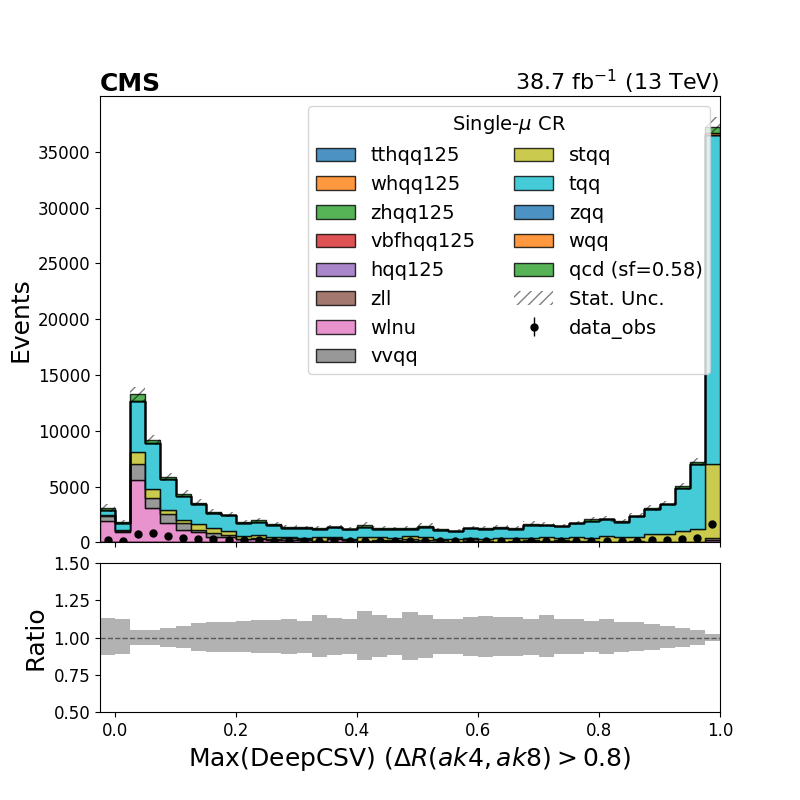

In [15]:

#lumi = 41.1
#lumi = 40.56  # JetHT
lumi = 38.687  # SingleMuon
nodata = re.compile("(?!data_obs)")
x.scale({p: lumi for p in x[nodata].identifiers('process')}, axis="process")

datasum = x["data_obs"].sum('process', xaxis).values()[()]
nodatasum = x[nodata].sum('process', xaxis).values()[()]
qcdsum = x["qcd"].sum('process', xaxis).values()[()]
#qcdsf = (datasum-nodatasum+qcdsum)/qcdsum
qcdsf = 0.5841
#x.scale({"qcd": 0.78, "tqq": 0.84}, axis="process")
x.scale({"qcd": qcdsf}, axis="process")


plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
})
fig, (ax, rax) = plt.subplots(2, 1, figsize=(8,8), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)

fill_opts = {
    'edgecolor': (0,0,0,0.3),
    'alpha': 0.8
}
error_opts = {
    'label':'Stat. Unc.',
    'hatch':'///',
    'facecolor':'none',
    'edgecolor':(0,0,0,.5),
    'linewidth': 0
}
data_err_opts = {
    'linestyle':'none',
    'marker': '.',
    'markersize': 10.,
    'color':'k',
    'elinewidth': 1,
    'emarker': '_'
}

hist.plot1d(x[nodata],
            overlay='process', 
            ax=ax,
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts,
            overflow='under'
           )
hist.plot1d(x["data_obs"],
            overlay='process',
            ax=ax,
            clear=False,
            error_opts=data_err_opts,
            overflow='under'
           )

ax.autoscale(axis='x', tight=True)
ax.set_ylim(0, None)
#ax.set_ylim(0, 800)
#ax.set_yscale('log')

ax.set_xlabel(None)
ax.ticklabel_format(axis='x', style='sci')
leg = ax.legend(title='Single-$\mu$ CR',ncol=2)
#leg = ax.legend(title='Signal region ($ddb>-\infty$)', )
#leg = ax.legend(title='Preselection', )
[t.set_text('qcd (sf=%.2f)' % qcdsf) for t in leg.get_texts() if t.get_text()=='qcd']


hist.plotratio(x["data_obs"].sum("process"), x[nodata].sum("process"), 
               ax=rax,
               error_opts=data_err_opts, 
               denom_fill_opts={},
               guide_opts={},
               unc='num',
               overflow='under'
              )
rax.set_ylabel('Ratio')
rax.set_ylim(0.5, 1.5)

coffee = plt.text(0., 1., u"CMS",
                  fontsize=18,
                  fontweight='bold',
                  horizontalalignment='left', 
                  verticalalignment='bottom', 
                  transform=ax.transAxes
                 )
lumi = plt.text(1., 1., r"%.1f fb$^{-1}$ (13 TeV)" % lumi,
                fontsize=16, 
                horizontalalignment='right', 
                verticalalignment='bottom', 
                transform=ax.transAxes
               )


In [ ]:
fig.savefig("%s.pdf" % hname)

In [ ]:
qcdsf